# Library Import

In [ ]:
# Suppress warnings for a cleaner output
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.use('Agg')  # Use Agg backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Ensure the backend is set appropriately if only plt is imported

# Enable inline plotting
%matplotlib inline

# For modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
import joblib

# Set Seaborn style
sns.set(style="whitegrid")

# Data Import

In [4]:
# Load the datasets
# We have two data files; here we load both. The second dataset appears to be the clean version.
file1 = '../data/track_data_final.csv'
file2 = '../data/spotify_data_clean.csv'


df_original = pd.read_csv(file1, encoding='utf-8')
df_clean = pd.read_csv(file2, encoding='utf-8')

# Let's inspect the shapes to get a sense of the data
print('Original Data Shape:', df_original.shape)
print('Clean Data Shape:', df_clean.shape)

Original Data Shape: (8778, 15)
Clean Data Shape: (8582, 15)


# Data Exploration

In [5]:
# Explore the first few rows of the clean dataset
print('Head of the clean data:')
display(df_clean.head())

# Get dataset information and summary statistics
print('Data Information:')
display(df_clean.info())

print('Summary statistics:')
display(df_clean.describe(include='all'))

Head of the clean data:


,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8582 non-null   object 
 1   track_name          8582 non-null   object 
 2   track_number        8582 non-null   int64  
 3   track_popularity    8582 non-null   int64  
 4   explicit            8582 non-null   bool   
 5   artist_name         8579 non-null   object 
 6   artist_popularity   8582 non-null   int64  
 7   artist_followers    8582 non-null   int64  
 8   artist_genres       5221 non-null   object 
 9   album_id            8582 non-null   object 
 10  album_name          8582 non-null   object 
 11  album_release_date  8582 non-null   object 
 12  album_total_tracks  8582 non-null   int64  
 13  album_type          8582 non-null   object 
 14  track_duration_min  8582 non-null   float64
dtypes: bool(1), float64(1), int64(5), obj

None

Summary statistics:


,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
count,8582,8582,8582.000000,8582.000000,8582,8579,8582.000000,8.582000e+03,5221,8582,8582,8582,8582.000000,8582,8582.000000
unique,8582,7462,NaN,NaN,2,2547,NaN,NaN,661,5205,4870,2384,NaN,3,NaN
top,3EJS5LyekDim1Tf5rBFmZl,Flowers,NaN,NaN,False,Taylor Swift,NaN,NaN,soundtrack,3FFGbUutKWN1c4f0CJR4Uh,Nevermind (Super Deluxe Edition),2010-01-01,NaN,album,NaN
freq,1,8,NaN,NaN,6434,324,NaN,NaN,345,70,70,76,NaN,5856,NaN
mean,NaN,NaN,5.772547,52.356211,NaN,NaN,69.730016,2.403472e+07,NaN,NaN,NaN,NaN,13.789443,NaN,3.492805
std,NaN,NaN,6.052792,23.816076,NaN,NaN,19.645979,3.803180e+07,NaN,NaN,NaN,NaN,11.887131,NaN,1.057970
min,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,1.000000,NaN,0.070000
25%,NaN,NaN,1.000000,39.000000,NaN,NaN,60.000000,4.623200e+05,NaN,NaN,NaN,NaN,6.000000,NaN,2.880000
50%,NaN,NaN,4.000000,58.000000,NaN,NaN,74.000000,6.105547e+06,NaN,NaN,NaN,NaN,13.000000,NaN,3.445000
75%,NaN,NaN,9.000000,71.000000,NaN,NaN,84.000000,2.725255e+07,NaN,NaN,NaN,NaN,17.000000,NaN,3.990000


## Data Cleaning and Preprocessing

In [6]:
# Convert album_release_date to datetime format
# Although the column is specified as a string, inferring the date type can be useful
for df in [df_original, df_clean]:
    if 'album_release_date' in df.columns:
        # Using errors='coerce' to avoid issues with unexpected date formats
        df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')

# Check for missing values in the clean dataframe
missing_vals = df_clean.isnull().sum()
print('Missing values in each column:')
print(missing_vals)

# Additional cleaning steps can be added here as necessary

# For numeric correlation analyses later, we extract only numeric columns from the clean data
numeric_df = df_clean.select_dtypes(include=[np.number])

Missing values in each column:
track_id                 0
track_name               0
track_number             0
track_popularity         0
explicit                 0
artist_name              3
artist_popularity        0
artist_followers         0
artist_genres         3361
album_id                 0
album_name               0
album_release_date       0
album_total_tracks       0
album_type               0
track_duration_min       0
dtype: int64


## Exploratory Data Analysis

Let's create various visualizations to understand the data better.

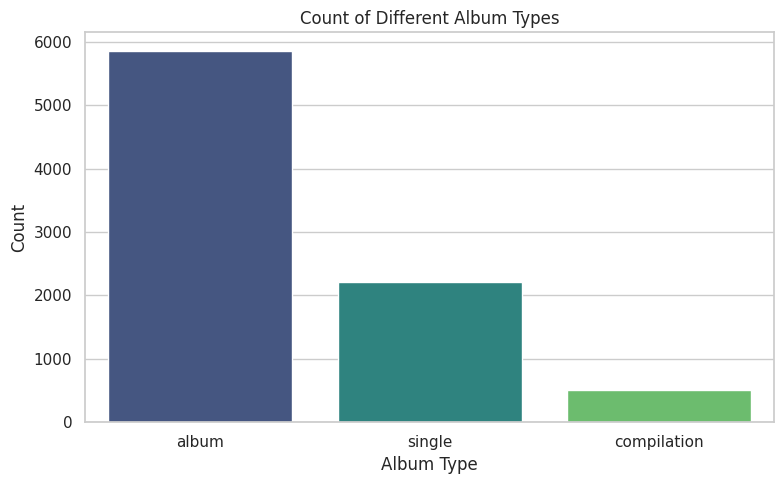

In [7]:
# Count Plot (Pie Chart analogy) for Album Types
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='album_type', palette='viridis')
plt.title('Count of Different Album Types')
plt.xlabel('Album Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

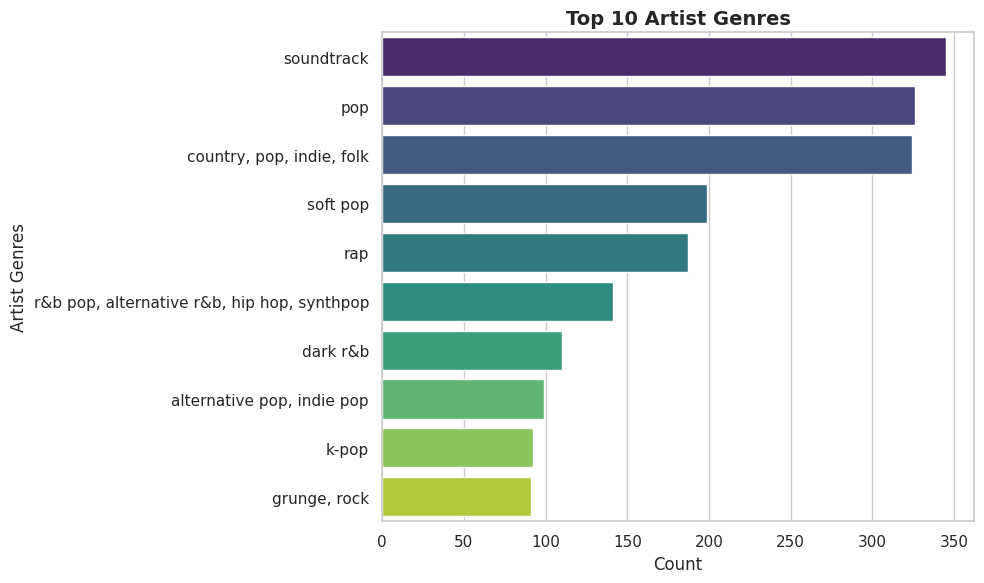

In [8]:
# Count PLot of Top 10 Artist Genres
genre_counts = df_clean['artist_genres'].value_counts().head(10)

# Count Plot (Pie Chart analogy) for Artist Genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Artist Genres', fontsize=14, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Artist Genres', fontsize=12)
plt.tight_layout()
plt.show()

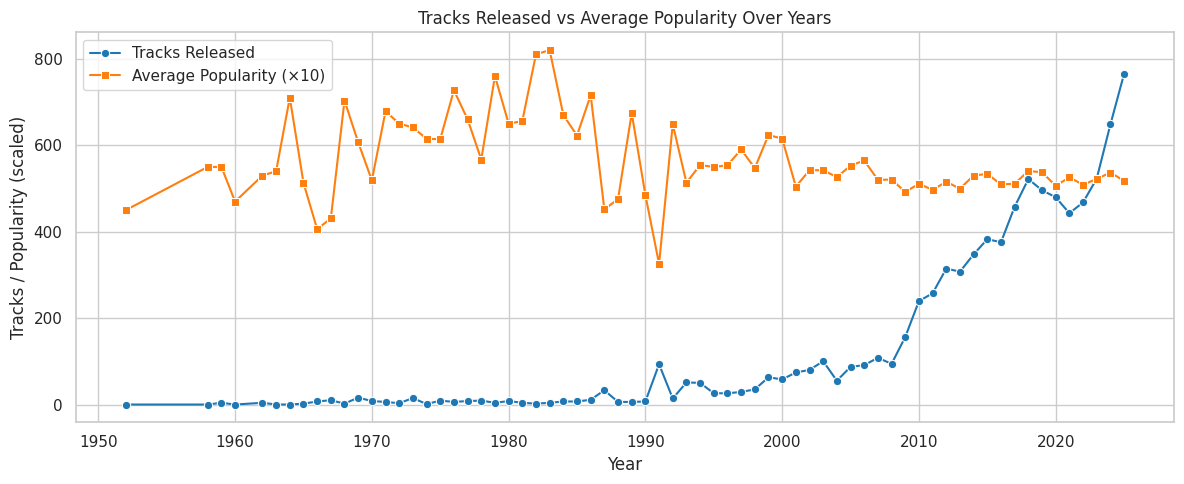

In [9]:
# Evolution of Average Popularity and Tracks Released

# Extract year
df_clean["year"] = pd.to_datetime(df_clean["album_release_date"]).dt.year

# Tracks per year
tracks_per_year = (df_clean["year"].value_counts().sort_index().reset_index())
tracks_per_year.columns = ["year", "track_count"]

# Average popularity per year
pop_year = (df_clean.groupby("year")["track_popularity"].mean().reset_index())

# Scale popularity to match track count scale
pop_year["popularity_scaled"] = pop_year["track_popularity"] * 10

# Plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 5))

sns.lineplot(
    data=tracks_per_year,
    x="year",
    y="track_count",
    marker="o",
    color="tab:blue",
    label="Tracks Released"
)

sns.lineplot(
    data=pop_year,
    x="year",
    y="popularity_scaled",
    marker="s",
    color="tab:orange",
    label="Average Popularity (×10)"
)

plt.title("Tracks Released vs Average Popularity Over Years")
plt.xlabel("Year")
plt.ylabel("Tracks / Popularity (scaled)")
plt.legend()
plt.tight_layout()
plt.show()

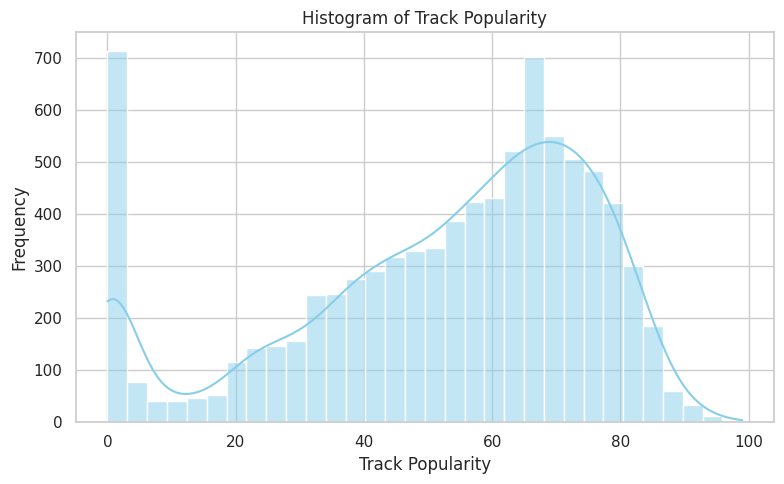

In [10]:
# Histogram of Track Popularity
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['track_popularity'], kde=True, color='skyblue')
plt.title('Histogram of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

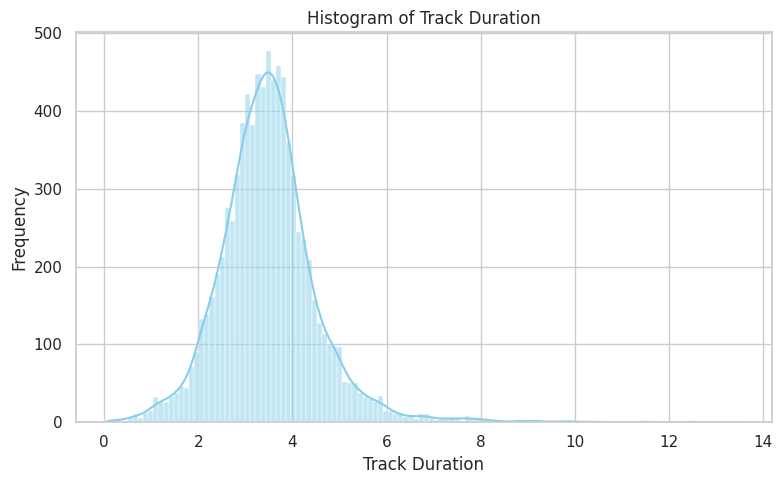

In [11]:
# Histogram of Track Duration
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['track_duration_min'], kde=True, color='skyblue')
plt.title('Histogram of Track Duration')
plt.xlabel('Track Duration')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

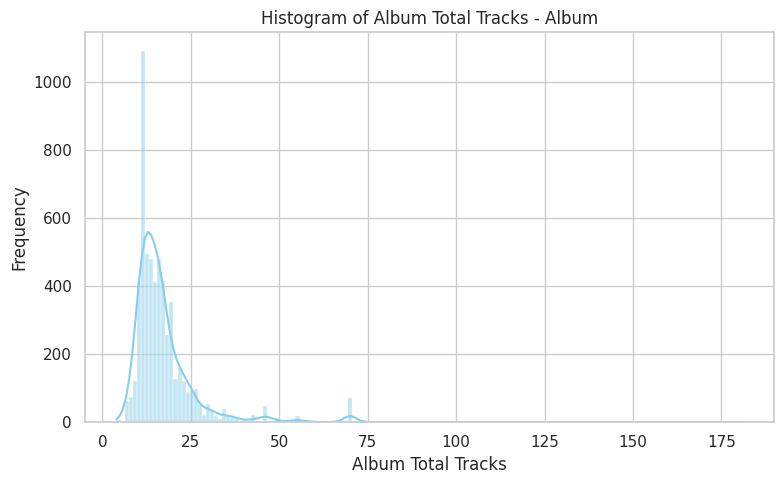

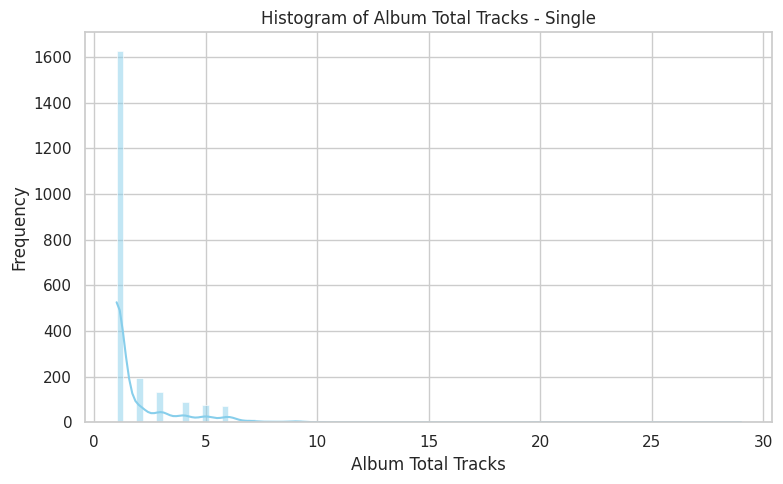

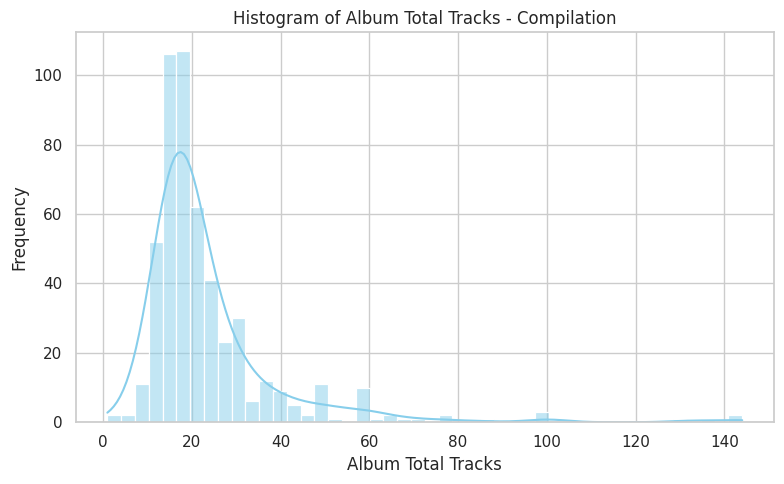

In [12]:
# Histogram of Album Total Tracks
for album_type in df_clean['album_type'].unique():
    plt.figure(figsize=(8, 5))
    data = df_clean[df_clean['album_type'] == album_type]['album_total_tracks']
    sns.histplot(data, kde=True, color='skyblue')
    plt.title(f'Histogram of Album Total Tracks - {album_type.capitalize()}')
    plt.xlabel('Album Total Tracks')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

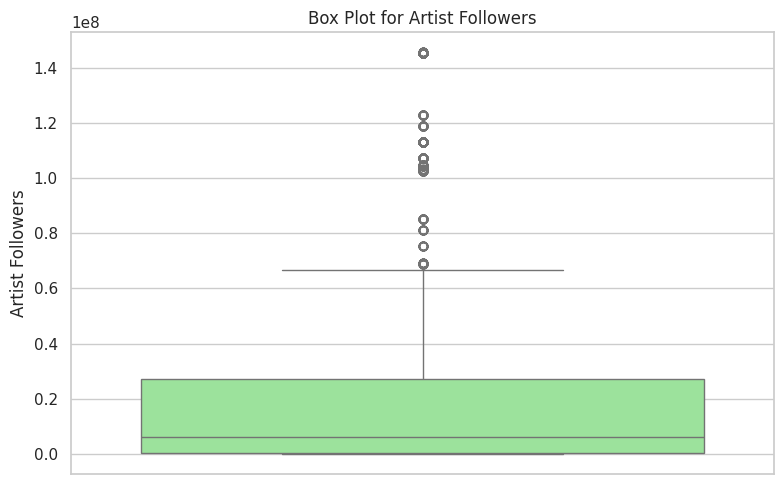

In [13]:
# Box Plot for Artist Followers
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, y='artist_followers', color='lightgreen')
plt.title('Box Plot for Artist Followers')
plt.ylabel('Artist Followers')
plt.tight_layout()
plt.show()

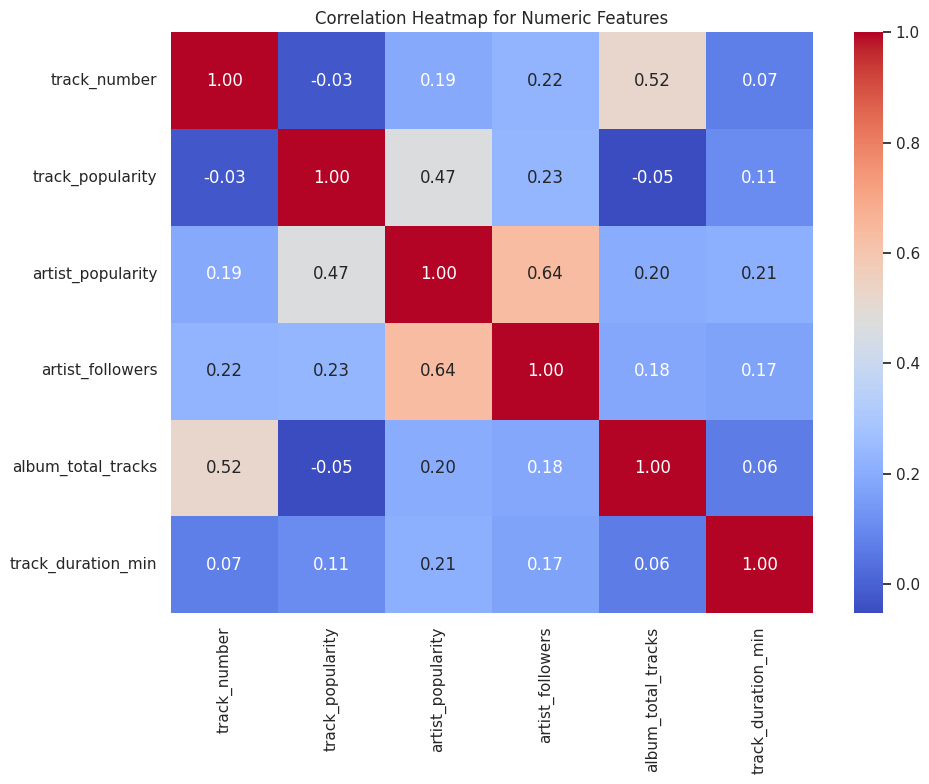

In [14]:
# Heatmap for numeric correlations (only if there are at least 4 numeric columns)
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap for Numeric Features')
    plt.tight_layout()
    plt.show()

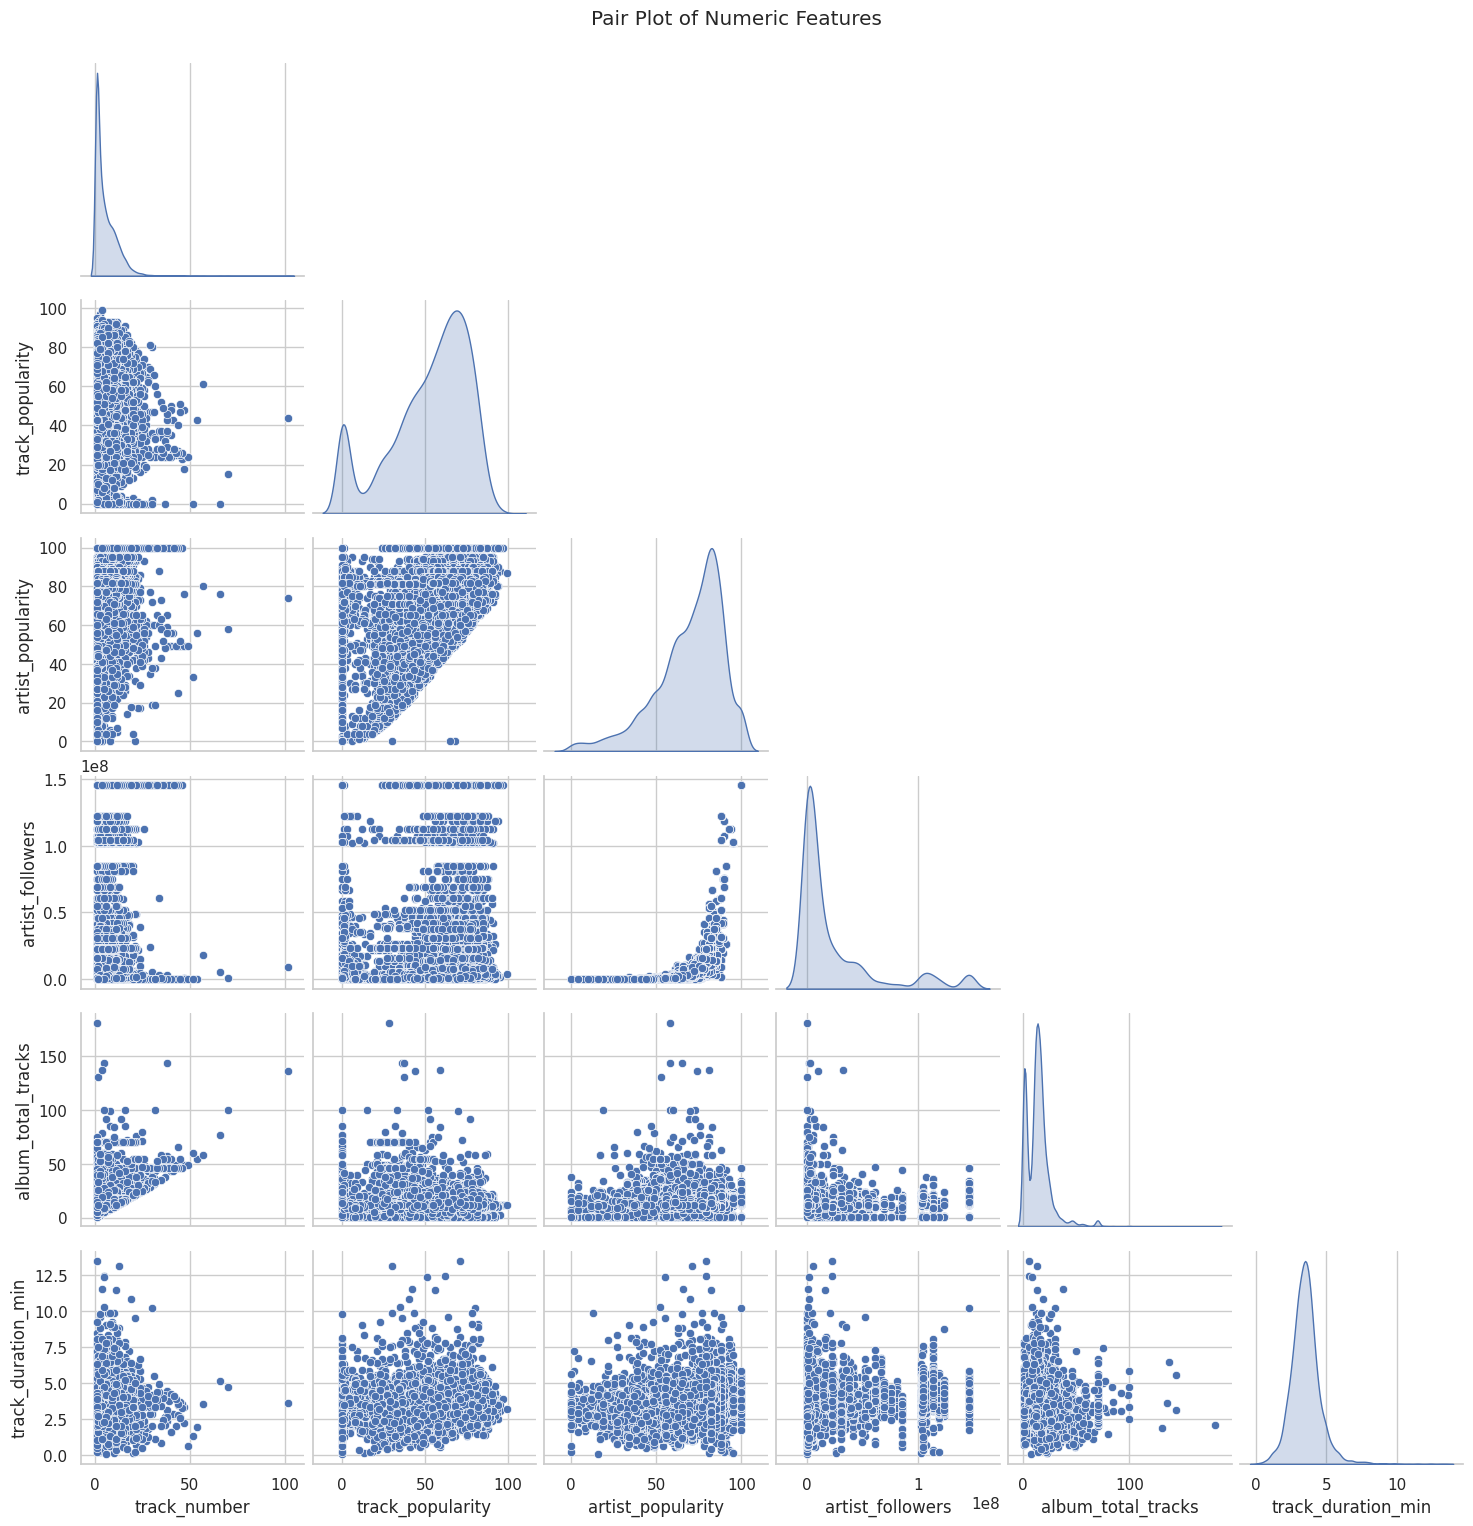

In [15]:
# Pair Plot for numeric variables
if numeric_df.shape[1] >= 2:
    sns.pairplot(numeric_df, diag_kind='kde', corner=True)
    plt.suptitle('Pair Plot of Numeric Features', y=1.02)
    plt.show()

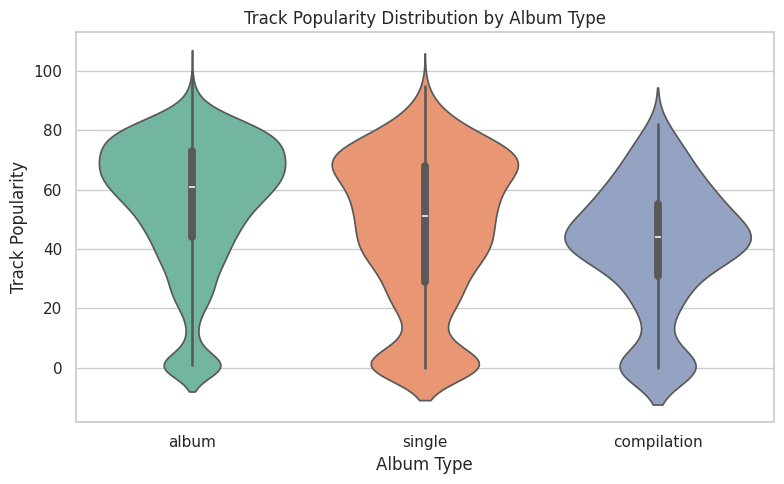

In [16]:
# Violin Plot for Track Popularity by Album Type
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_clean, x='album_type', y='track_popularity', palette='Set2')
plt.title('Track Popularity Distribution by Album Type')
plt.xlabel('Album Type')
plt.ylabel('Track Popularity')
plt.tight_layout()
plt.show()

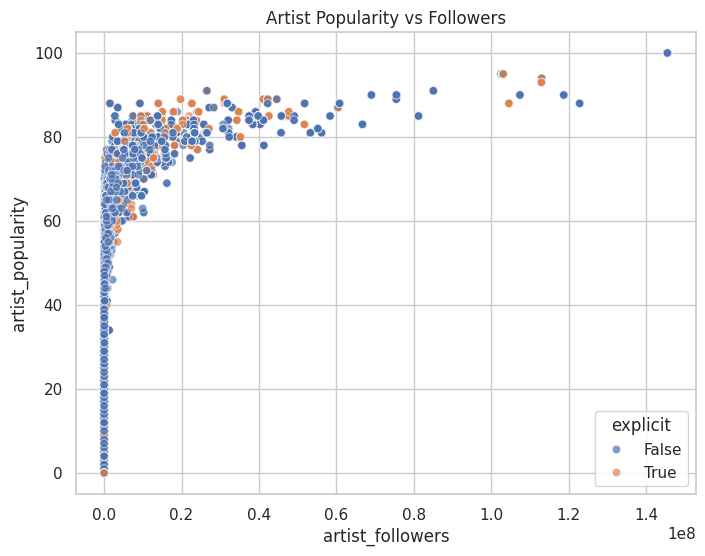

In [17]:
# Scatterplot for Artist Popularity and Followers
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="artist_followers",
    y="artist_popularity",
    hue="explicit",
    alpha=0.7
)
plt.title("Artist Popularity vs Followers")
plt.show()

In [18]:
df.head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min,year
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55,2025
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07,2025
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55,2025
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69,2025
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39,2025


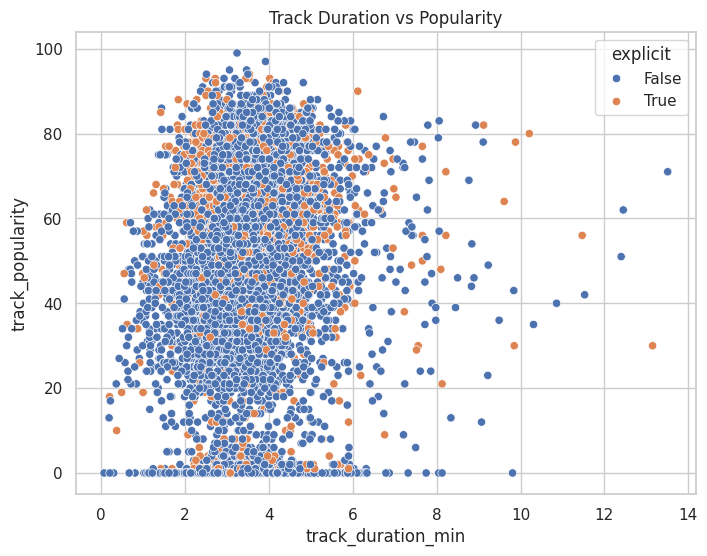

In [19]:
# Scatterplot for Track Popularity and Duration
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="track_duration_min",
    y="track_popularity",
    hue="explicit"
)
plt.title("Track Duration vs Popularity")
plt.show()

# Predictive Analysis

In [20]:

# Prepare the data
df = df_clean.copy()

# Handle missing values
df = df.dropna(subset=['track_popularity', 'artist_popularity', 'artist_followers'])

# Encode categorical variables
le_genre = LabelEncoder()
df['artist_genres_encoded'] = df['artist_genres'].fillna('unknown').astype(str)
df['artist_genres_encoded'] = le_genre.fit_transform(df['artist_genres_encoded'])

le_explicit = LabelEncoder()
df['explicit_encoded'] = le_explicit.fit_transform(df['explicit'])

le_album_type = LabelEncoder()
df['album_type_encoded'] = le_album_type.fit_transform(df['album_type'])

# Select features for prediction
features = [
    'track_number',
    'explicit_encoded',
    'artist_popularity',
    'artist_followers',
    'artist_genres_encoded',
    'album_total_tracks',
    'album_type_encoded',
    'track_duration_min'
]

X = df[features]
y = df['track_popularity']  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

Root Mean Squared Error: 19.74
R² Score: 0.345

Feature Importance:
                 feature  importance
2      artist_popularity    0.297079
3       artist_followers    0.205969
7     track_duration_min    0.183444
5     album_total_tracks    0.127056
4  artist_genres_encoded    0.084641
0           track_number    0.067355
1       explicit_encoded    0.018394
6     album_type_encoded    0.016063


In [21]:
# DATA QUALITY DIAGNOSTIC TOOL
# =============================
# Run this FIRST to see what's wrong with your data

print("="*70)
print("DATA QUALITY DIAGNOSTIC REPORT")
print("="*70)

# Load your data
# df_clean = pd.read_csv('your_data.csv')  # Uncomment if needed

# ============================================================================
# 1. BASIC DATASET INFO
# ============================================================================
print("\n[1] BASIC DATASET INFORMATION")
print("-"*70)
print(f"Dataset shape: {df_clean.shape[0]} rows × {df_clean.shape[1]} columns")
print(f"Memory usage: {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# ============================================================================
# 2. MISSING VALUES ANALYSIS
# ============================================================================
print("\n[2] MISSING VALUES ANALYSIS")
print("-"*70)

missing = df_clean.isnull().sum()
missing_pct = (missing / len(df_clean)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_pct.values,
    'Data_Type': df_clean.dtypes.values
})

# Sort by missing percentage
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values(
    'Missing_Percentage', ascending=False
)

if len(missing_df) > 0:
    print("\n⚠️  COLUMNS WITH MISSING VALUES:")
    print("-"*70)
    for idx, row in missing_df.iterrows():
        print(f"{row['Column']:30s} | "
              f"Missing: {row['Missing_Count']:6.0f} ({row['Missing_Percentage']:5.1f}%) | "
              f"Type: {row['Data_Type']}")
else:
    print("\n✓ No missing values found!")

# ============================================================================
# 3. DATA TYPE ANALYSIS
# ============================================================================
print("\n[3] DATA TYPE ANALYSIS")
print("-"*70)

dtype_counts = df_clean.dtypes.value_counts()
print("\nColumn types distribution:")
for dtype, count in dtype_counts.items():
    print(f"  {dtype}: {count} columns")

print("\nDetailed column information:")
for col in df_clean.columns:
    dtype = df_clean[col].dtype
    n_unique = df_clean[col].nunique()
    print(f"  {col:30s} | Type: {str(dtype):15s} | Unique: {n_unique:6d}")

# ============================================================================
# 4. TARGET VARIABLE ANALYSIS
# ============================================================================
print("\n[4] TARGET VARIABLE ANALYSIS (track_popularity)")
print("-"*70)

if 'track_popularity' in df_clean.columns:
    target = df_clean['track_popularity']
    
    print(f"Missing values: {target.isnull().sum()} ({target.isnull().sum()/len(target)*100:.1f}%)")
    
    if target.isnull().sum() < len(target):
        valid_target = target.dropna()
        print(f"\nStatistics (excluding NaN):")
        print(f"  Mean:   {valid_target.mean():.2f}")
        print(f"  Median: {valid_target.median():.2f}")
        print(f"  Std:    {valid_target.std():.2f}")
        print(f"  Min:    {valid_target.min():.2f}")
        print(f"  Max:    {valid_target.max():.2f}")
        
        print(f"\nDistribution:")
        print(f"  Q1 (25%):  {valid_target.quantile(0.25):.2f}")
        print(f"  Q2 (50%):  {valid_target.quantile(0.50):.2f}")
        print(f"  Q3 (75%):  {valid_target.quantile(0.75):.2f}")
else:
    print("⚠️  Column 'track_popularity' not found!")

# ============================================================================
# 5. FEATURE-SPECIFIC ISSUES
# ============================================================================
print("\n[5] POTENTIAL DATA ISSUES")
print("-"*70)

issues_found = False

# Check for negative values in columns that shouldn't have them
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if (df_clean[col] < 0).any():
        negative_count = (df_clean[col] < 0).sum()
        print(f"⚠️  {col}: Contains {negative_count} negative values")
        issues_found = True

# Check for infinite values
for col in numeric_cols:
    if np.isinf(df_clean[col]).any():
        inf_count = np.isinf(df_clean[col]).sum()
        print(f"⚠️  {col}: Contains {inf_count} infinite values")
        issues_found = True

# Check for zeros in columns where zero might be problematic
potential_zero_issues = ['artist_followers', 'album_total_tracks', 'track_duration_min']
for col in potential_zero_issues:
    if col in df_clean.columns:
        zero_count = (df_clean[col] == 0).sum()
        if zero_count > 0:
            print(f"⚠️  {col}: Contains {zero_count} zero values ({zero_count/len(df_clean)*100:.1f}%)")
            issues_found = True

# Check for very high values (potential outliers)
for col in numeric_cols:
    if col in df_clean.columns:
        q99 = df_clean[col].quantile(0.99)
        max_val = df_clean[col].max()
        if max_val > q99 * 10:  # If max is 10x the 99th percentile
            print(f"⚠️  {col}: Potential extreme outliers (99th %ile: {q99:.2f}, Max: {max_val:.2f})")
            issues_found = True

if not issues_found:
    print("✓ No obvious data quality issues found!")

# ============================================================================
# 6. SAMPLE DATA PREVIEW
# ============================================================================
print("\n[6] SAMPLE DATA PREVIEW")
print("-"*70)
print("\nFirst 3 rows:")
print(df_clean.head(3))

print("\n\nRandom 3 rows:")
print(df_clean.sample(3, random_state=42))

# ============================================================================
# 7. RECOMMENDATIONS
# ============================================================================
print("\n[7] RECOMMENDATIONS")
print("-"*70)

recommendations = []

# Check missing values in target
if 'track_popularity' in df_clean.columns:
    if df_clean['track_popularity'].isnull().sum() > 0:
        recommendations.append(
            f"• Remove {df_clean['track_popularity'].isnull().sum()} rows with missing track_popularity"
        )

# Check high missing percentages
high_missing = missing_df[missing_df['Missing_Percentage'] > 50]
if len(high_missing) > 0:
    recommendations.append(
        f"• Consider dropping columns with >50% missing: {', '.join(high_missing['Column'].tolist())}"
    )

# Check for categorical columns that need encoding
object_cols = df_clean.select_dtypes(include=['object']).columns
if len(object_cols) > 0:
    recommendations.append(
        f"• Encode categorical columns: {', '.join(object_cols.tolist())}"
    )

# Data type recommendations
if 'explicit' in df_clean.columns and df_clean['explicit'].dtype == 'object':
    recommendations.append(
        "• Convert 'explicit' to boolean/binary (0/1)"
    )

if 'album_release_date' in df_clean.columns:
    recommendations.append(
        "• Extract year/month from 'album_release_date'"
    )

if recommendations:
    print("\n" + "\n".join(recommendations))
else:
    print("\n✓ Data looks ready for modeling!")

# ============================================================================
# 8. QUICK FIX COMMANDS
# ============================================================================
print("\n[8] QUICK FIX COMMANDS")
print("-"*70)
print("""
# Remove rows with missing target:
df_clean = df_clean.dropna(subset=['track_popularity'])

# Fill missing numerical values with median:
numerical_cols = ['artist_popularity', 'artist_followers', 'track_duration_min']
for col in numerical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Fill missing categorical values:
df_clean['artist_genres'] = df_clean['artist_genres'].fillna('unknown')
df_clean['album_type'] = df_clean['album_type'].fillna('unknown')

# Convert explicit to binary:
df_clean['explicit'] = df_clean['explicit'].map({True: 1, False: 0}).fillna(0)
""")

print("\n" + "="*70)
print("✓ DIAGNOSTIC COMPLETE")
print("="*70)
print("\nNext step: Run the prediction script (track_popularity_fixed.py)")

DATA QUALITY DIAGNOSTIC REPORT

[1] BASIC DATASET INFORMATION
----------------------------------------------------------------------
Dataset shape: 8582 rows × 16 columns
Memory usage: 4.17 MB

[2] MISSING VALUES ANALYSIS
----------------------------------------------------------------------

⚠️  COLUMNS WITH MISSING VALUES:
----------------------------------------------------------------------
artist_genres                  | Missing:   3361 ( 39.2%) | Type: object
artist_name                    | Missing:      3 (  0.0%) | Type: object

[3] DATA TYPE ANALYSIS
----------------------------------------------------------------------

Column types distribution:
  object: 7 columns
  int64: 5 columns
  bool: 1 columns
  datetime64[ns]: 1 columns
  float64: 1 columns
  int32: 1 columns

Detailed column information:
  track_id                       | Type: object          | Unique:   8582
  track_name                     | Type: object          | Unique:   7462
  track_number                

TRACK POPULARITY PREDICTION

[1/8] Cleaning data and handling missing values...
   Initial dataset shape: (8582, 16)
   Missing values per column:
      artist_name: 3 (0.0%)
      artist_genres: 3361 (39.2%)
   After removing NaN targets: (8582, 16)

[2/8] Filling missing values in features...
   Filled 3361 NaN values in 'artist_genres' with 'unknown'
   Filled 3 NaN values in 'artist_name' with 'unknown'

[3/8] Engineering features...
   Release year filled with median: 2018.0
   Created 10 engineered features

[4/8] Selecting and verifying features...
   Checking for NaN values in features...
   ✓ No NaN values found - data is clean!

   Final dataset info:
   Total samples: 8582
   Features: 17
   Target range: 0.0 to 99.0

[5/8] Splitting data...
   Training samples: 6865
   Testing samples: 1717

[6/8] Training models...

MODEL PERFORMANCE

Training Random Forest...
  ✓ Train RMSE: 11.72
  ✓ Test RMSE:  18.74
  ✓ Train R²:   0.755
  ✓ Test R²:    0.409
  ✓ Test MAE:   13.50

Tra

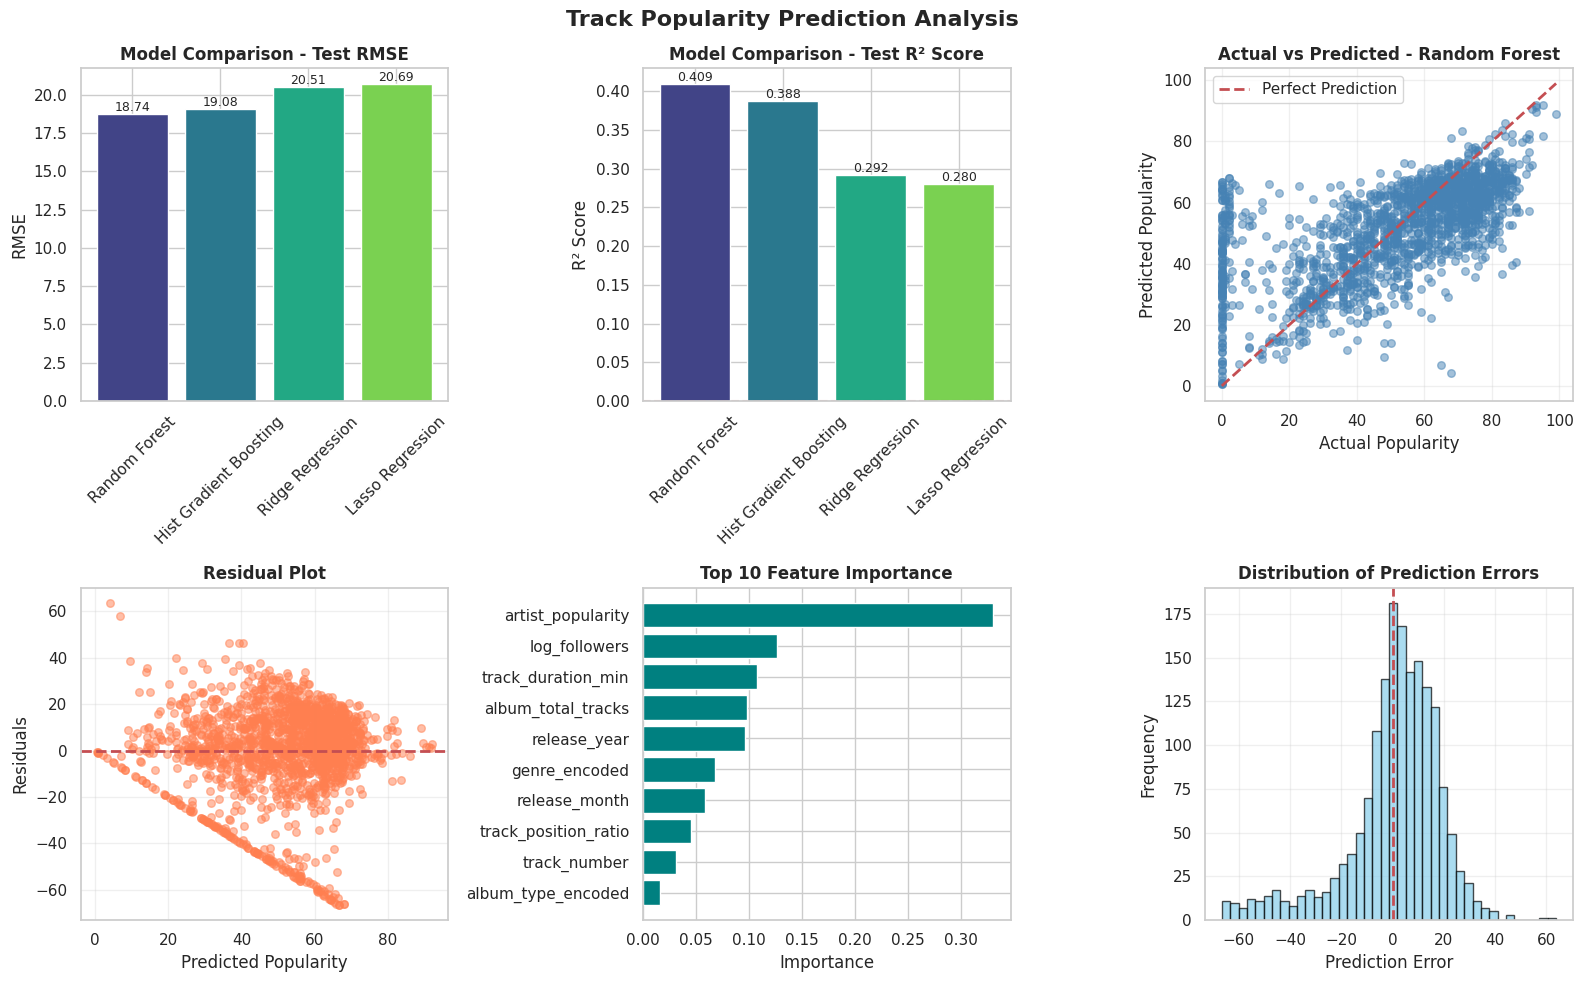

   ✓ Visualization saved as 'track_popularity_analysis.png'

FEATURE IMPORTANCE
artist_popularity              0.3303
log_followers                  0.1268
track_duration_min             0.1079
album_total_tracks             0.0978
release_year                   0.0961
genre_encoded                  0.0680
release_month                  0.0591
track_position_ratio           0.0457
track_number                   0.0315
album_type_encoded             0.0162
explicit_binary                0.0101
is_recent                      0.0038
artist_pop_medium              0.0016
duration_long                  0.0016
duration_short                 0.0013
artist_pop_high                0.0012
is_single                      0.0010

✓ ANALYSIS COMPLETE!

To make predictions on new data:
  new_predictions = best_model.predict(X_new)

To save the model:
  import joblib
  joblib.dump(best_model, 'track_popularity_model.pkl')


In [22]:
# Track Popularity Prediction
# ============================================================================



# ============================================================================
# STEP 1: LOAD YOUR DATA
# ============================================================================
# df_clean = pd.read_csv('your_data.csv')  # Uncomment and load your data
# Or if you already have df_clean loaded, skip this step

print("="*70)
print("TRACK POPULARITY PREDICTION")
print("="*70)

# ============================================================================
# STEP 2: COMPREHENSIVE DATA CLEANING
# ============================================================================
print("\n[1/8] Cleaning data and handling missing values...")

df = df_clean.copy()

# First, show what we're working with
print(f"   Initial dataset shape: {df.shape}")
print(f"   Missing values per column:")
missing_info = df.isnull().sum()
for col in missing_info[missing_info > 0].index:
    print(f"      {col}: {missing_info[col]} ({missing_info[col]/len(df)*100:.1f}%)")

# Drop rows where target variable is missing
df = df.dropna(subset=['track_popularity'])
print(f"   After removing NaN targets: {df.shape}")

# ============================================================================
# STEP 3: HANDLE MISSING VALUES IN FEATURES
# ============================================================================
print("\n[2/8] Filling missing values in features...")

# Numerical columns - fill with median
numerical_features = [
    'track_number', 
    'artist_popularity', 
    'artist_followers', 
    'track_duration_min',
    'album_total_tracks'
]

for col in numerical_features:
    if col in df.columns:
        median_value = df[col].median()
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            df[col] = df[col].fillna(median_value)
            print(f"   Filled {missing_count} NaN values in '{col}' with median: {median_value:.2f}")

# Categorical columns - fill with 'unknown'
categorical_features = ['artist_genres', 'album_type', 'artist_name', 'album_name']
for col in categorical_features:
    if col in df.columns:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            df[col] = df[col].fillna('unknown')
            print(f"   Filled {missing_count} NaN values in '{col}' with 'unknown'")

# Boolean column - fill with most common value (False)
if 'explicit' in df.columns:
    missing_count = df['explicit'].isnull().sum()
    if missing_count > 0:
        df['explicit'] = df['explicit'].fillna(False)
        print(f"   Filled {missing_count} NaN values in 'explicit' with False")

# ============================================================================
# STEP 4: FEATURE ENGINEERING
# ============================================================================
print("\n[3/8] Engineering features...")

# 1. Explicit as binary
df['explicit_binary'] = df['explicit'].map({True: 1, False: 0, 'True': 1, 'False': 0})
df['explicit_binary'] = df['explicit_binary'].fillna(0).astype(int)

# 2. Album type encoding
df['album_type'] = df['album_type'].astype(str).str.lower()
le_album = LabelEncoder()
df['album_type_encoded'] = le_album.fit_transform(df['album_type'])

# 3. Release date features
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')
df['release_year'] = df['album_release_date'].dt.year
df['release_month'] = df['album_release_date'].dt.month

# Fill missing dates with median year and mid-year month
median_year = df['release_year'].median()
df['release_year'] = df['release_year'].fillna(median_year)
df['release_month'] = df['release_month'].fillna(6)

print(f"   Release year filled with median: {median_year}")

# 4. Track position ratio (with safety check for division by zero)
df['track_position_ratio'] = np.where(
    df['album_total_tracks'] > 0,
    df['track_number'] / df['album_total_tracks'],
    0.5  # Default to middle of album if total tracks is 0
)

# 5. Log transform followers (handles large numbers and zeros)
df['log_followers'] = np.log1p(df['artist_followers'].fillna(0))

# 6. Genre encoding
df['artist_genres'] = df['artist_genres'].astype(str)
le_genre = LabelEncoder()
df['genre_encoded'] = le_genre.fit_transform(df['artist_genres'])

# 7. Is it a single?
df['is_single'] = (df['album_type'] == 'single').astype(int)

# 8. Artist popularity bins
df['artist_pop_high'] = (df['artist_popularity'] >= 70).astype(int)
df['artist_pop_medium'] = ((df['artist_popularity'] >= 40) & (df['artist_popularity'] < 70)).astype(int)

# 9. Track duration category
df['duration_short'] = (df['track_duration_min'] < 2.5).astype(int)
df['duration_long'] = (df['track_duration_min'] > 4.0).astype(int)

# 10. Recent release (last 2 years)
current_year = 2025
df['is_recent'] = (df['release_year'] >= current_year - 2).astype(int)

print(f"   Created {10} engineered features")

# ============================================================================
# STEP 5: SELECT FEATURES AND VERIFY NO NaN
# ============================================================================
print("\n[4/8] Selecting and verifying features...")

features = [
    'track_number',
    'explicit_binary',
    'artist_popularity',
    'log_followers',
    'album_total_tracks',
    'track_duration_min',
    'album_type_encoded',
    'release_year',
    'release_month',
    'track_position_ratio',
    'genre_encoded',
    'is_single',
    'artist_pop_high',
    'artist_pop_medium',
    'duration_short',
    'duration_long',
    'is_recent'
]

X = df[features].copy()
y = df['track_popularity'].copy()

# CRITICAL: Final check for any remaining NaN values
print(f"   Checking for NaN values in features...")
nan_check = X.isnull().sum()
if nan_check.sum() > 0:
    print("   WARNING: Found NaN values:")
    for col in nan_check[nan_check > 0].index:
        print(f"      {col}: {nan_check[col]}")
        # Fill any remaining NaN with 0
        X[col] = X[col].fillna(0)
    print("   ✓ All remaining NaN values filled with 0")
else:
    print("   ✓ No NaN values found - data is clean!")

# Check target variable
if y.isnull().sum() > 0:
    print(f"   WARNING: Found {y.isnull().sum()} NaN in target variable")
    valid_indices = ~y.isnull()
    X = X[valid_indices]
    y = y[valid_indices]
    print(f"   ✓ Removed rows with NaN target. New shape: {X.shape}")

print(f"\n   Final dataset info:")
print(f"   Total samples: {len(X)}")
print(f"   Features: {len(features)}")
print(f"   Target range: {y.min():.1f} to {y.max():.1f}")

# ============================================================================
# STEP 6: SPLIT DATA
# ============================================================================
print("\n[5/8] Splitting data...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"   Training samples: {len(X_train)}")
print(f"   Testing samples: {len(X_test)}")

# ============================================================================
# STEP 7: TRAIN MODELS (Using NaN-safe versions)
# ============================================================================
print("\n[6/8] Training models...")

models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ),
    'Hist Gradient Boosting': HistGradientBoostingRegressor(
        max_iter=200,
        learning_rate=0.1,
        max_depth=10,
        random_state=42
    ),
    'Ridge Regression': Ridge(alpha=10.0),
    'Lasso Regression': Lasso(alpha=1.0, max_iter=5000)
}

results = {}
trained_models = {}

print("\n" + "="*70)
print("MODEL PERFORMANCE")
print("="*70)

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    try:
        # Train model
        model.fit(X_train, y_train)
        trained_models[name] = model
        
        # Predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        # Metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)
        test_mae = mean_absolute_error(y_test, y_pred_test)
        
        results[name] = {
            'Train RMSE': train_rmse,
            'Test RMSE': test_rmse,
            'Train R²': train_r2,
            'Test R²': test_r2,
            'Test MAE': test_mae,
            'predictions': y_pred_test
        }
        
        print(f"  ✓ Train RMSE: {train_rmse:.2f}")
        print(f"  ✓ Test RMSE:  {test_rmse:.2f}")
        print(f"  ✓ Train R²:   {train_r2:.3f}")
        print(f"  ✓ Test R²:    {test_r2:.3f}")
        print(f"  ✓ Test MAE:   {test_mae:.2f}")
        
    except Exception as e:
        print(f"  ✗ Error training {name}: {str(e)}")
        continue

# ============================================================================
# STEP 8: FIND BEST MODEL
# ============================================================================
print("\n[7/8] Identifying best model...")

if results:
    best_model_name = max(results.keys(), key=lambda x: results[x]['Test R²'])
    best_model = trained_models[best_model_name]
    
    print("\n" + "="*70)
    print(f"🏆 BEST MODEL: {best_model_name}")
    print("="*70)
    print(f"Test R² Score: {results[best_model_name]['Test R²']:.3f}")
    print(f"Test RMSE:     {results[best_model_name]['Test RMSE']:.2f}")
    print(f"Test MAE:      {results[best_model_name]['Test MAE']:.2f}")
    print("="*70)
else:
    print("ERROR: No models trained successfully!")
    best_model_name = None
    best_model = None

# ============================================================================
# STEP 9: VISUALIZATIONS
# ============================================================================
print("\n[8/8] Creating visualizations...")

if best_model_name:
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    fig.suptitle('Track Popularity Prediction Analysis', fontsize=16, fontweight='bold')
    
    # Plot 1: Model Comparison - RMSE
    ax1 = axes[0, 0]
    model_names = list(results.keys())
    test_rmse = [results[m]['Test RMSE'] for m in model_names]
    colors = sns.color_palette('viridis', len(model_names))
    bars = ax1.bar(model_names, test_rmse, color=colors)
    ax1.set_title('Model Comparison - Test RMSE', fontweight='bold')
    ax1.set_ylabel('RMSE')
    ax1.tick_params(axis='x', rotation=45)
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom', fontsize=9)
    
    # Plot 2: Model Comparison - R²
    ax2 = axes[0, 1]
    test_r2 = [results[m]['Test R²'] for m in model_names]
    bars = ax2.bar(model_names, test_r2, color=colors)
    ax2.set_title('Model Comparison - Test R² Score', fontweight='bold')
    ax2.set_ylabel('R² Score')
    ax2.tick_params(axis='x', rotation=45)
    ax2.axhline(y=0, color='r', linestyle='--', alpha=0.3)
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)
    
    # Plot 3: Actual vs Predicted
    ax3 = axes[0, 2]
    y_pred_best = results[best_model_name]['predictions']
    ax3.scatter(y_test, y_pred_best, alpha=0.5, s=30, color='steelblue')
    ax3.plot([y_test.min(), y_test.max()], 
            [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
    ax3.set_xlabel('Actual Popularity')
    ax3.set_ylabel('Predicted Popularity')
    ax3.set_title(f'Actual vs Predicted - {best_model_name}', fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Residuals
    ax4 = axes[1, 0]
    residuals = y_test - y_pred_best
    ax4.scatter(y_pred_best, residuals, alpha=0.5, s=30, color='coral')
    ax4.axhline(y=0, color='r', linestyle='--', lw=2)
    ax4.set_xlabel('Predicted Popularity')
    ax4.set_ylabel('Residuals')
    ax4.set_title('Residual Plot', fontweight='bold')
    ax4.grid(True, alpha=0.3)
    
    # Plot 5: Feature Importance
    ax5 = axes[1, 1]
    if hasattr(best_model, 'feature_importances_'):
        importance_df = pd.DataFrame({
            'Feature': features,
            'Importance': best_model.feature_importances_
        }).sort_values('Importance', ascending=False).head(10)
        
        ax5.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
        ax5.set_xlabel('Importance')
        ax5.set_title('Top 10 Feature Importance', fontweight='bold')
        ax5.invert_yaxis()
    else:
        ax5.text(0.5, 0.5, 'Feature importance\nnot available for this model',
                ha='center', va='center', transform=ax5.transAxes, fontsize=12)
        ax5.set_title('Feature Importance', fontweight='bold')
    
    # Plot 6: Error Distribution
    ax6 = axes[1, 2]
    ax6.hist(residuals, bins=40, edgecolor='black', alpha=0.7, color='skyblue')
    ax6.axvline(x=0, color='r', linestyle='--', lw=2)
    ax6.set_xlabel('Prediction Error')
    ax6.set_ylabel('Frequency')
    ax6.set_title('Distribution of Prediction Errors', fontweight='bold')
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../images/track_popularity_analysis.png', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    print("   ✓ Visualization saved as 'track_popularity_analysis.png'")
    
    # Feature Importance Table
    if hasattr(best_model, 'feature_importances_'):
        print("\n" + "="*70)
        print("FEATURE IMPORTANCE")
        print("="*70)
        importance_df = pd.DataFrame({
            'Feature': features,
            'Importance': best_model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        for idx, row in importance_df.iterrows():
            print(f"{row['Feature']:30s} {row['Importance']:.4f}")

print("\n" + "="*70)
print("✓ ANALYSIS COMPLETE!")
print("="*70)
print("\nTo make predictions on new data:")
print("  new_predictions = best_model.predict(X_new)")
print("\nTo save the model:")
print("  import joblib")
print("  joblib.dump(best_model, 'track_popularity_model.pkl')")
print("="*70)